<a href="https://colab.research.google.com/github/Abhi0391/spam-vs-ham-mobile-nb/blob/main/SPAM_vs_HAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics
from sklearn.model_selection import train_test_split, cross_val_score

#libraries for text processing
import re, nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#Data: https://drive.google.com/file/d/1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV/view?usp=sharing
id = "1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV"
path = "https://docs.google.com/uc?export=download&id=" + id
print(path)

https://docs.google.com/uc?export=download&id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV


In [3]:
!wget "https://docs.google.com/uc?export=download&id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV" -O spam_message.csv

--2024-06-17 02:56:46--  https://docs.google.com/uc?export=download&id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV
Resolving docs.google.com (docs.google.com)... 74.125.132.113, 74.125.132.102, 74.125.132.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.132.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV&export=download [following]
--2024-06-17 02:56:46--  https://drive.usercontent.google.com/download?id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 483640 (472K) [application/octet-stream]
Saving to: ‘spam_message.csv’

spam_message.csv    100%[===================>] 472.30K  --.-KB/s    

In [4]:
df=pd.read_csv("./spam_message.csv",encoding='latin-1')

In [5]:
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


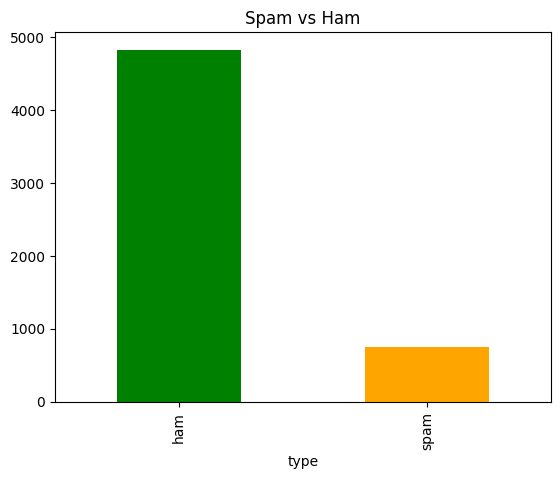

In [6]:
counts = pd.value_counts(df["type"],sort=True)
counts.plot(kind="bar",color=["green","orange"])
plt.title("Spam vs Ham")
plt.show()

In [7]:
#Cleaning the text data
def clean_message(text):
  clean_text = "" #create empty string to store processed sentence
  words = nltk.word_tokenize(text)
  for word in words:
    c_word = word.lower() #converting it into lowercase
    c_word = re.sub(r'[^\w\s]','',c_word) #removing punctuations
    if c_word != '' and c_word not in stopwords.words('english'):
      clean_text = clean_text + " " + c_word #Append processed word to new variable
  return (clean_text.strip())


In [8]:
df["clean_message"] = df["message"].apply(clean_message)
df.head(10)

,type,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 week word back like fun ...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile 11 months u r entitled update latest co...


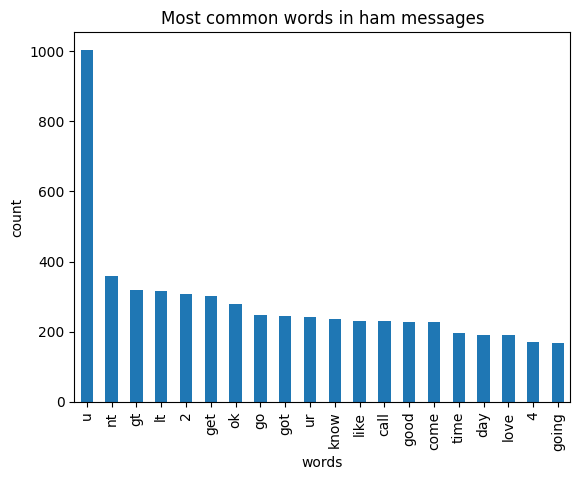

In [9]:
#finding most common word in spam and ham messages
counter_ham = Counter(" ".join(df[df["type"]=="ham"]["clean_message"]).split()).most_common(20)
df_ham = pd.DataFrame.from_dict(counter_ham)
df_ham = df_ham.rename(columns={0:"words in ham",1:"count"})
df_ham.plot.bar(legend=False)
y_pos = np.arange(len(df_ham["words in ham"]))
plt.xticks(y_pos, df_ham["words in ham"])
plt.title("Most common words in ham messages")
plt.xlabel("words")
plt.ylabel("count")
plt.show()

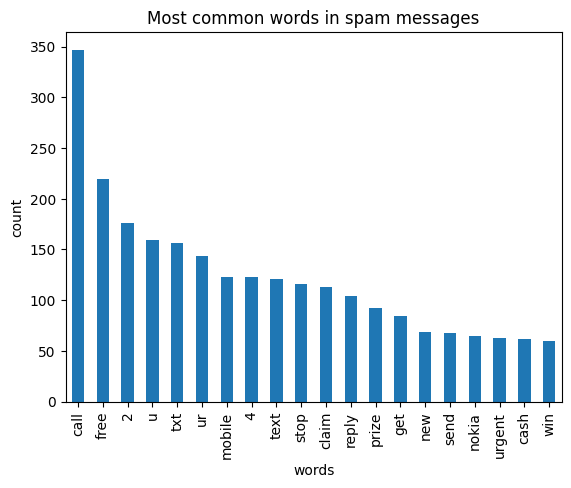

In [10]:
counter_spam = Counter(" ".join(df[df["type"]=="spam"]["clean_message"]).split()).most_common(20)
df_spam = pd.DataFrame.from_dict(counter_spam)
df_spam = df_spam.rename(columns={0:"words in spam",1:"count"})
df_spam.plot.bar(legend=False)
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title("Most common words in spam messages")
plt.xlabel("words")
plt.ylabel("count")
plt.show()

In [11]:
df["type"] = df["type"].map({'ham': 0, 'spam': 1})

In [12]:
X_train,X_test,y_train,y_test = train_test_split(df["clean_message"],df["type"],test_size = 0.25 ,random_state=1)

In [13]:
print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


In [17]:
#count Vectorizer
f = feature_extraction.text.CountVectorizer()
X_train = f.fit_transform(X_train)
X_test = f.transform(X_test)

In [19]:
#Multinomial Naive Bayes
from sklearn.model_selection import GridSearchCV

params = {
            'alpha' : [0.01, 0.1, 1, 10, 100]
         }
mnb = naive_bayes.MultinomialNB()
clf = GridSearchCV(mnb, params, cv = 5)

clf.fit(X_train, y_train)
res = clf.cv_results_

In [21]:
for i in range(len(res['params'])):
  print(f"Parameters:{res['params'][i]} Mean_Score:{res['mean_test_score'][i]} Rank:{res['rank_test_score'][i]}")

Parameters:{'alpha': 0.01} Mean_Score:0.9743958972008138 Rank:2
Parameters:{'alpha': 0.1} Mean_Score:0.9734383863851244 Rank:3
Parameters:{'alpha': 1} Mean_Score:0.975353694524826 Rank:1
Parameters:{'alpha': 10} Mean_Score:0.9688926453313469 Rank:4
Parameters:{'alpha': 100} Mean_Score:0.8985405266022978 Rank:5
